# Tests de différents modèles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

In [2]:
file_path = os.getcwd() + "/data/dataset.csv"

with open(file_path, 'r') as f:
    df = pd.read_csv(file_path, index_col=0)

In [3]:
df

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2020-08-09,107.250000,37.190000,NaN,NaN,NaN,0.346760,1883.296000,1861.3,71.3,245.0,66.1,0.0,0.0,0.000000,1883.296000,-21.996000
2020-08-11,104.650000,33.150000,NaN,NaN,NaN,0.316770,1914.400000,1772.4,50.5,185.8,104.1,0.0,0.0,0.000000,1914.400000,-142.000000
2020-08-12,104.350000,33.800000,NaN,NaN,NaN,0.323910,1893.880000,1894.3,59.3,220.3,87.5,0.0,0.0,0.000000,1893.880000,0.420000
2020-08-13,104.400000,34.340000,NaN,NaN,NaN,0.328927,1883.296000,1822.6,71.5,227.7,70.2,0.0,0.0,0.000000,1883.296000,-60.696000
2020-08-14,104.500000,33.850000,NaN,NaN,NaN,0.323923,1896.040000,1891.5,61.8,217.2,82.5,0.0,0.0,0.000000,1896.040000,-4.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,71.778000,11.741000,3.002000,57.021000,40.210000,0.163574,1666.799200,1740.8,47.6,148.3,185.7,1920.0,286.0,248.960018,1915.759218,-174.959218
2023-12-07,71.472727,11.860000,2.980909,56.617273,39.779091,0.165937,1657.634909,1796.1,40.5,128.5,233.9,1980.0,308.0,270.012533,1927.647442,-131.547442
2023-12-08,70.765455,11.520909,2.962727,56.264545,39.486364,0.162804,1649.682182,1813.7,50.8,176.5,166.7,3120.0,274.0,214.428143,1864.110325,-50.410325
2023-12-09,72.284545,11.750909,3.027273,57.490000,40.686364,0.162565,1677.526545,3355.5,96.9,442.8,188.9,0.0,0.0,0.000000,1677.526545,1677.973455


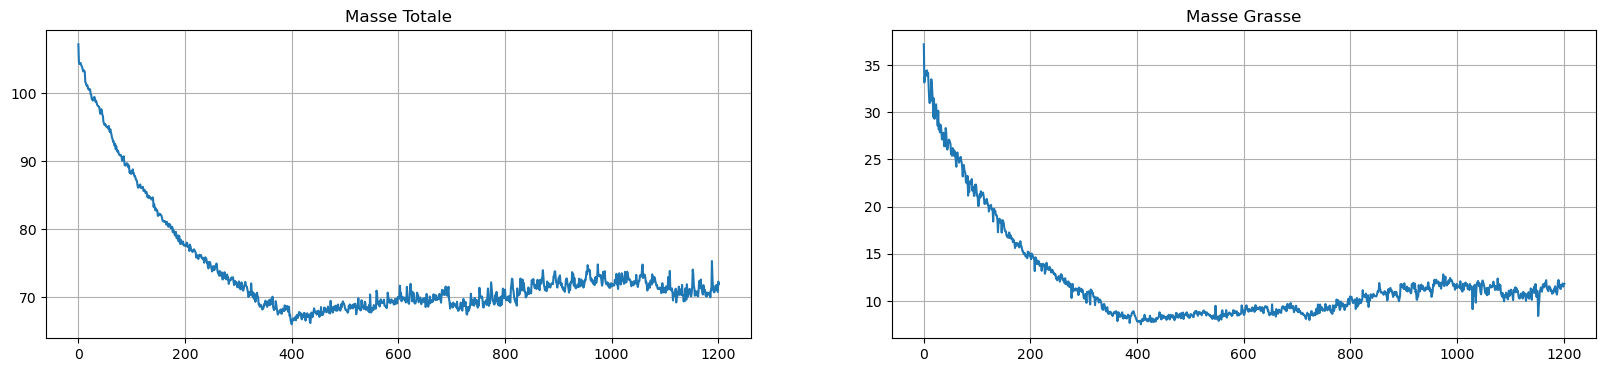

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
# plt.locator_params(axis='x', nticks=10)

ax[0].plot(df['Masse_Totale'].to_numpy())
ax[0].grid()
ax[0].set_title('Masse Totale')

ax[1].plot(df['Masse_Grasse'].to_numpy())
ax[1].grid()
ax[1].set_title('Masse Grasse')

# ax[0] = sns.lineplot(data=df, y='Masse_Totale', ax=ax[0])
# ax[0].grid()
# ax[0].tick_params(axis='x', labelrotation=60)

# ax[1] = sns.lineplot(data=df, x=df.index, y='Masse_Grasse', ax=ax[1])
# ax[1].grid()
# ax[1].tick_params(axis='x', labelrotation=60)

plt.show()

In [5]:
df_model = df.dropna()

In [6]:
columns_to_drop = ['MG%', 'BMR', 'Lipides', 'Glucides', 'Proteines', 'exo_duree', 'exo_cals_bruts', 'Depense_cal_totale', 'cal_deficit']
df_model = df_model.drop(columns=columns_to_drop)

In [7]:
df_model.head(10)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,Calories,exo_cals_nets
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,2271.1,0.000000
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,1774.3,353.867654
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,1759.7,498.562450
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,2516.4,979.099745
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,1658.9,336.012941
2023-03-09,72.158571,10.134286,3.127143,58.882857,42.768571,3428.1,709.697273
2023-03-10,73.675714,10.644286,3.181429,59.834286,43.564286,1830.7,65.951683
2023-03-11,72.780000,10.491667,3.138333,59.133333,42.865000,4222.7,469.663584
2023-03-12,73.335000,11.686667,3.086667,58.546667,41.781667,0.6,585.880608
2023-03-13,71.690000,11.170000,3.031667,57.476667,40.816667,2658.9,220.199850


In [8]:
AVERAGE_DAYS = 7  # période sur laquelle on va moyenner les données quotidiennes pour diminuer le bruit

PERIODE_CALCUL_VARIATION = 7 # delta de calcul de la variation

In [39]:
def create_df(average_days=AVERAGE_DAYS, periode_calcul_variation=PERIODE_CALCUL_VARIATION, df=df):
    """Crée la dataframe avec les paramètres de moyenne passés en argument
    """
    df_model = df.dropna()
    columns_to_drop = ['MG%', 'BMR', 'Lipides', 'Glucides', 'Proteines', 'exo_duree', 'exo_cals_bruts', 'Depense_cal_totale', 'cal_deficit']
    df_model = df_model.drop(columns=columns_to_drop)   
    
    # moyenne toutes les valeurs sur AVERAGE_DAYS
    df_model = df_model.rolling(window=average_days).mean().dropna()
    
    # pour les masses, calcule la variation moyenne quotidienne entre la valeur à J et la valeur à J-PERIODE_CALCUL_VARIATION, et la stocke au jour J.
    list_deltas = ['Masse_Totale', 'Masse_Grasse', 'Masse_Musculaire', 'Masse_Osseuse', 'Masse_Hydrique']
    for nom in list_deltas:
        nom_delta = 'delta_' + nom
        df_model[nom_delta] = (df_model[nom] - df_model[nom].shift(periode_calcul_variation))/periode_calcul_variation
        
    # pour les calories (food, exercices), calcule la moyenne des Calories et calories nettes d'exercice entre J-PERIODE_CALCUL_VARIATION et J, et la stocke au jour J+1
    liste_calories = ['Calories', 'exo_cals_nets']
    for nom in liste_calories:
        nom_cal = 'moyenne_' + nom
        df_model[nom_cal] = df_model[nom].rolling(periode_calcul_variation).mean().shift(1)
        
    df_model.dropna(inplace=True)
    
    # Les données au jour J sont :
    # - la différence entre la valeur des masses à J et les masses à J-PERIODE_DE_VARIATION
    # - les moyennes de calories entre J-PERIODE_DE_VRAIATION-1 et J-1
    
    return df_model

In [44]:
def visu_df(df_model=df_model):
    """visualise 2D et 3D

    Args:
        df_model (_type_, optional): _description_. Defaults to df_model.
    """
    
    # Visu
    
    N_COLS = 4
    N_ROWS = len(df_model.columns)//N_COLS+1

    fig, axs = plt.subplots(nrows=N_ROWS,ncols=N_COLS, figsize=(36,12))

    for i,name in enumerate(df_model.columns):
        r = i%N_ROWS
        c = i//N_COLS
        titre = name + f' - moyenne {AVERAGE_DAYS}j'
        axs[r,c].set_title(titre)
        df_model[name].plot(ax=axs[r,c])
        axs[r,c].grid(True)
        
    plt.show()
        
    # Visu

    columns_to_display = ['delta_Masse_Grasse', 'delta_Masse_Musculaire'] #, 'delta_Masse_Totale', 'delta_Masse_Osseuse', 'delta_Masse_Hydrique']

    # fig, axs = plt.subplots(3,2,figsize=(24,12), subplot_kw={"projection" : "3d"})

    x = df_model['moyenne_Calories']
    y = df_model['moyenne_exo_cals_nets']

    X = np.arange(x.min(), x.max(), 10.0)
    Y = np.arange(y.min(), y.max(), 10.0)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros(shape=X.shape)

    for i,name in enumerate(columns_to_display):
        z = df_model[name]
        titre = name + f'\ntoutes valeurs moyennées sur {AVERAGE_DAYS} jours' + F'\nvariation quotidienne masses moyennée sur {PERIODE_CALCUL_VARIATION} jours'
        fig, ax = plt.subplots(subplot_kw={"projection" : "3d"}, figsize=(8,8))

        ax.set_title(titre)
        
        c = [ 'blue' if val >= 0 else 'red' for val in z ]
        ax.scatter(x, y, z, label=name, color=c)
        
        ax.plot_surface(X, Y, Z, edgecolor='yellow', lw=0.5, rstride=8, cstride=8, alpha=0.2)

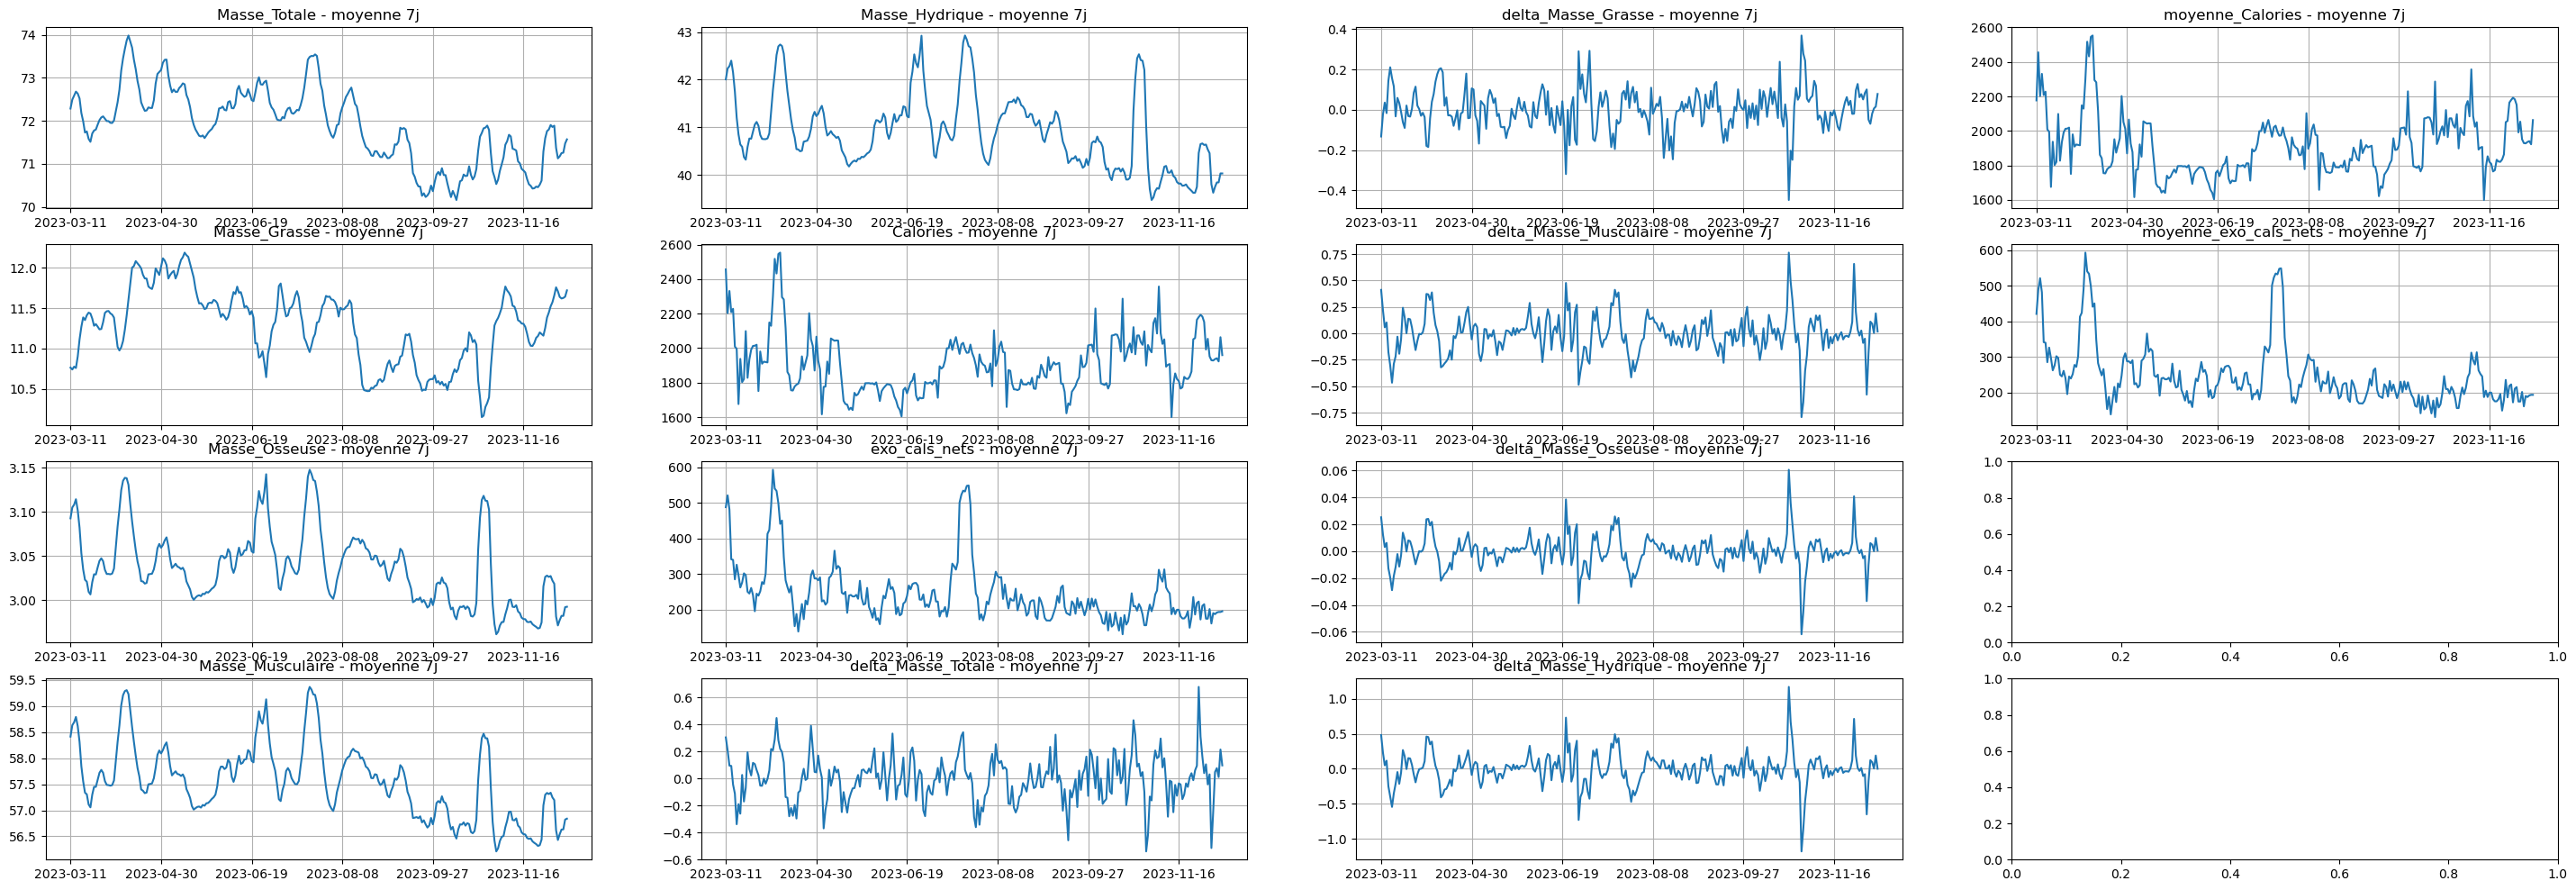

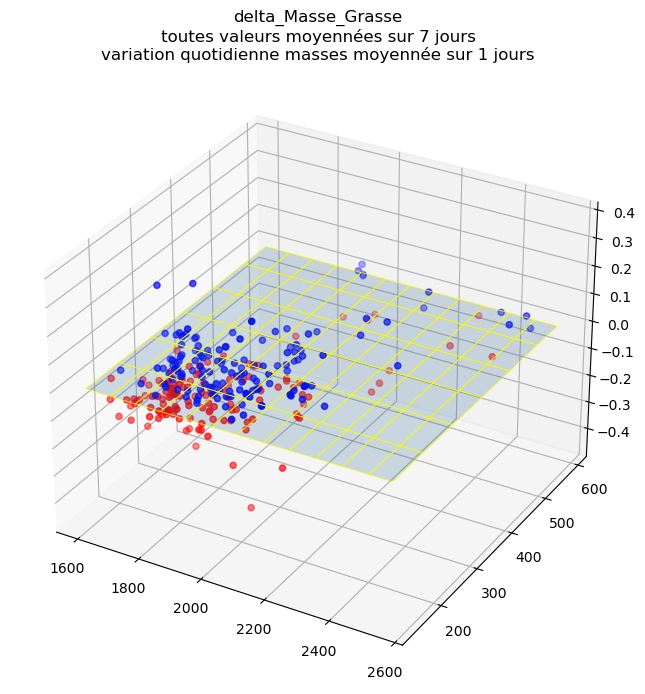

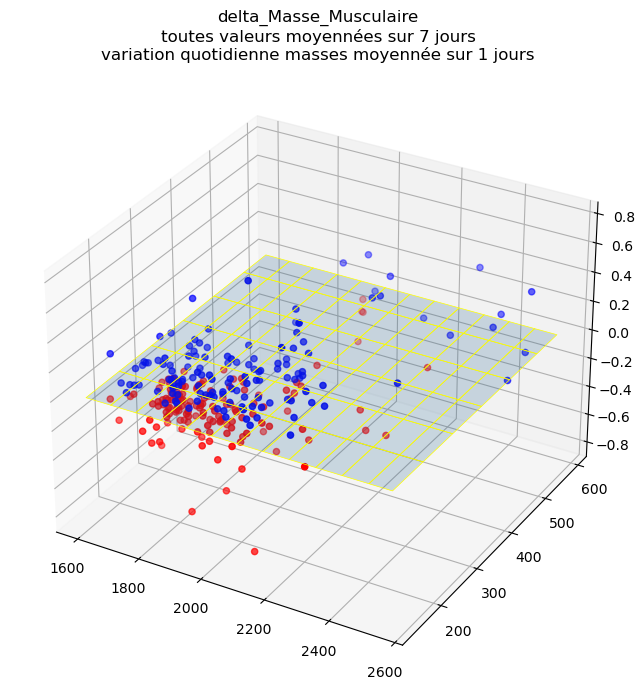

In [51]:
AVERAGE_DAYS = 7  # période sur laquelle on va moyenner les données quotidiennes pour diminuer le bruit
PERIODE_CALCUL_VARIATION = 1 # delta de calcul de la variation

df_model = create_df(average_days=AVERAGE_DAYS, periode_calcul_variation=PERIODE_CALCUL_VARIATION, df=df)

visu_df(df_model=df_model)

In [49]:
df_model.head(20)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,Calories,exo_cals_nets,delta_Masse_Totale,delta_Masse_Grasse,delta_Masse_Musculaire,delta_Masse_Osseuse,delta_Masse_Hydrique,moyenne_Calories,moyenne_exo_cals_nets
2023-04-05,72.125537,11.179395,3.055754,57.875483,41.267076,2053.783333,362.366099,0.051594,-0.016540,0.064271,0.003894,0.073242,2024.061111,340.910822
2023-04-06,72.179314,11.164617,3.059976,57.939705,41.342743,2063.340000,356.480249,0.048166,-0.019450,0.063580,0.004050,0.074998,2035.980000,354.748051
2023-04-07,72.217383,11.190263,3.060357,57.951790,41.344123,2124.800000,349.637871,0.054315,-0.001711,0.052736,0.003256,0.057538,2057.345556,357.984492
2023-04-08,72.302430,11.243953,3.061507,57.982084,41.353560,2073.040000,335.565407,0.058965,0.021519,0.035534,0.001918,0.028828,2080.641111,356.161406
2023-04-09,72.313716,11.274858,3.059888,57.964036,41.321226,2103.993333,339.097743,0.044801,0.036747,0.008111,-0.000029,-0.007172,2087.060000,347.227842
2023-04-10,72.358049,11.332269,3.058544,57.952458,41.288393,2021.986667,335.808053,0.046889,0.047335,0.000223,-0.000604,-0.018577,2100.611111,341.433674
2023-04-11,72.374883,11.351380,3.058322,57.950474,41.281385,2076.530000,338.605015,0.024151,0.035809,-0.010537,-0.001062,-0.024058,2066.340000,336.823734
2023-04-12,72.451466,11.374005,3.061016,58.001585,41.327746,2042.350000,331.265020,0.045917,0.033049,0.012516,0.000376,0.002173,2067.503333,337.836937
2023-04-13,72.451514,11.411148,3.058667,57.966808,41.281119,2041.743333,342.734464,0.031155,0.026293,0.004783,0.000041,-0.002425,2046.955556,335.226029
2023-04-14,72.466847,11.446656,3.057461,57.947958,41.253572,2039.440000,331.915712,0.030655,0.031759,-0.000839,-0.000287,-0.009271,2053.541111,337.534833
